In [59]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io.wavfile as spw
import time
import pyaudio

In [9]:
#Question 1
x = np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h = np.array([(1/3),(1/3),(1/3)])
xpad = np.pad(x,(3,3,))
hpad = np.pad(h,(7,6))


In [23]:
#fft
Xs = np.fft.fft(xpad)
Hs = np.fft.fft(hpad)
#multipy fft together
Ys = np.multiply(Xs,Hs)
#inverse fft
y = np.fft.ifft(np.fft.fftshift(Ys))
#magnitude and convolve
ymag = np.abs(np.fft.fftshift(y))[2:-2]
print(ymag)

[1.         2.33333333 2.66666667 2.33333333 2.66666667 4.33333333
 6.         7.         5.66666667 4.66666667 2.         1.33333333]


In [4]:
#convolve and compare original and new function
np.convolve(x,h,'same')

array([2.33333333, 2.66666667, 2.33333333, 2.66666667, 4.33333333,
       6.        , 7.        , 5.66666667, 4.66666667, 2.        ])

/var/folders/y1/wt0h1yhn5hxd3qg29h4rkdgm0000gn/T/ipykernel_66950/1806735777.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  clipwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/clip.wav')


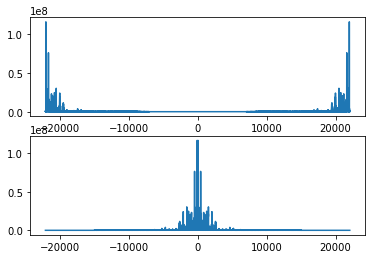

In [55]:
#Read files
clipwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/clip.wav')
corwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/Corcovado.wav')
#take samply from specified time
corwave_arr = np.array(corwave[1])
fs = float(corwave[0])
st = int(122*fs)
fin = int(125*fs)
cortrim = corwave_arr[st:fin,0]
#fft for wave
corfft = np.fft.fft(cortrim)
#plot the waves
fig,ax = plt.subplots(2,1)

maxfs = fs/2
freq = np.linspace(-maxfs,maxfs,corfft.size)
ax[0].plot(freq,np.abs(corfft))
ax[1].plot(freq,np.abs(np.fft.fftshift(corfft)))


In [57]:
maxin = np.argmax(np.abs(corfft))
sfreq = freq[maxin]
n = np.linspace(0,100,101)
ssin = np.sin(2*np.pi*n)

In [60]:
P = pyaudio.PyAudio()
play = P.open(rate=int(fs), format = pyaudio.paInt16, channels=1, Output = True)
play.write(ssin.astype(np.float32).tostring())
play.close()

NameError: name 'pyaudio' is not defined

In [38]:
#Question 3
#Part 1
fs = 128
xt = np.linspace(0,1,128)
val = []
for i in xt:
    y = np.cos(2*np.pi*i)
    val.append(y)
print(val)
val = np.array(val)

[1.0, 0.9987764162142613, 0.9951086591716066, 0.9890057044881307, 0.9804824871166253, 0.9695598647982466, 0.9562645670201275, 0.9406291296038439, 0.9226918150848067, 0.9024965190774262, 0.8800926628551884, 0.855535072408516, 0.8288838442763838, 0.8002041984800171, 0.7695663189185699, 0.7370451816173638, 0.7027203712489902, 0.6666758863762795, 0.6289999338937425, 0.5897847131705195, 0.5491261904230725, 0.5071238638697733, 0.46388052024208937, 0.41950198324822896, 0.37409685460479325, 0.32777624827017693, 0.2806535185300931, 0.2328439826006414, 0.18446463842775596, 0.13563387837362578, 0.08647119949074576, 0.03709691109260524, -0.012368159663362882, -0.061802963460083966, -0.11108652504880433, -0.16009823929579758, -0.2087181663233351, -0.25682732502266786, -0.3043079842207361, -0.35104395078807754, -0.396920853982887, -0.44182642533538663, -0.4856507733875833, -0.5282866526160838, -0.5696297258798569, -0.6095788197507078, -0.6480361721016052, -0.6849076713469912, -0.7201030867496003, -0

Clearly it is not a nnyquist rate becuase it is way more then double

/Users/jacobeverly/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


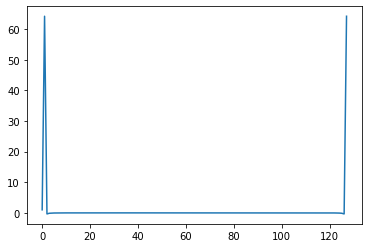

In [19]:
#Part 2
def dft(val,N = None):
    k = np.arange(0,N)
    n = np.arange(0,N)
    val2 = []
    for i in k:
        y = np.sum(val*(np.exp(-1j*2*np.pi*i*n/N)))
        val2.append(y)
    return val2
    
dft(val,128)

plt.plot(dft(val,128))

In [44]:
def seperate(sig, N):
    return sig[::2],sig[1::2]

def MyFFT(sig,N):
    if N < 2:
        return sig
    else:
        e,o = seperate(sig,N)
        E = MyFFT(e,int(N/2))
        O = MyFFT(o,int(N/2))
        X = np.zeros(int(N),dtype = np.cdouble)
        k = np.arange(int(N/2))
        X[:int(N/2)] = E+O*np.exp(-1j*2*np.pi*k/N)
        X[int(N/2):] = E-O*np.exp(-1j*2*np.pi*k/N)
        return X
    
        


In [45]:
V = MyFFT(val,128)

/Users/jacobeverly/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


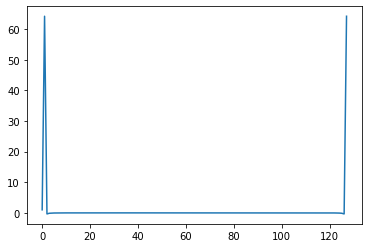

In [46]:
plt.plot(MyFFT(val,128))

In [53]:
fs, clipwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/clip.wav')
clipwave = clipwave[:8192,0]

start = time.time()
MyFFT(clipwave,8192)
print(f"MyFFT Time = {time.time()-start}")

start = time.time()
dft(clipwave,8192)
print(f"DFT Time = {time.time()-start}")




/var/folders/y1/wt0h1yhn5hxd3qg29h4rkdgm0000gn/T/ipykernel_66950/2703542015.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, clipwave = spw.read('/Users/jacobeverly/Documents/DSP/HW2/wav-files/clip.wav')


MyFFT Time = 0.10216283798217773
DFT Time = 1.2873280048370361
